<a href="https://colab.research.google.com/github/TomasMathews/AMA_Solo_SM/blob/main/Solo_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [6]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Newton-raphson error

Line of best fit: [ 2.05707549 -1.9060996 ]


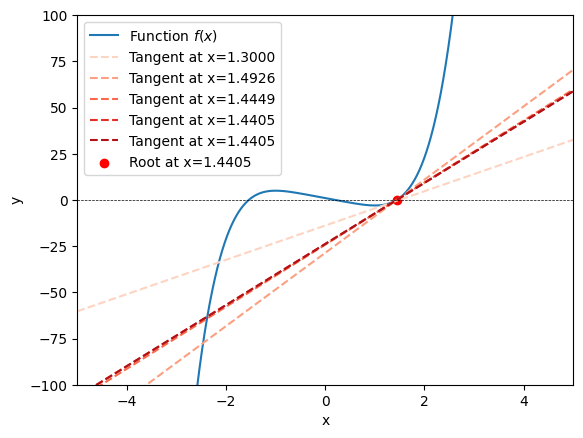

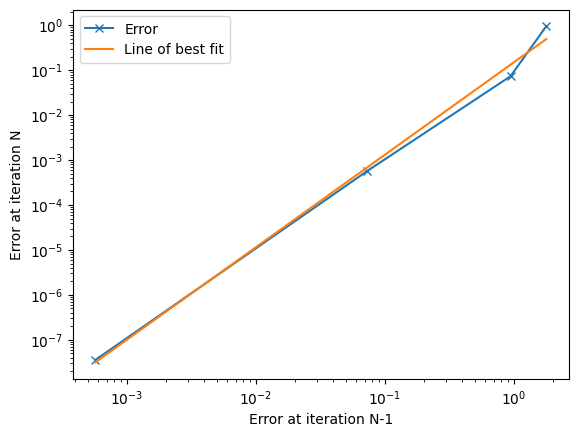

('root:1.44050039734156',
 'error: [1.7870699999999995, 0.9445200653606198, 0.07318115675235948, 0.0005711505271355222, 3.568299344891557e-08, 1.7763568394002505e-15]',
 'iterations:5')

In [7]:
def newton_method(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    iterations = 0
    roots = [x]  # Store the root at each iteration for plotting
    errors = [abs(f(x))]

    while errors[-1] > tol and iterations < max_iter:
        x = x - f(x) / df(x)
        roots.append(x)  # Store the root at each iteration
        errors.append(abs(f(x)))
        iterations += 1

    return x, iterations, roots, errors

def plot_newton_convergence(f, df, x0, tol=1e-10, max_iter=100):
    x_vals = np.linspace(-100, 100, 1000000)
    y_vals = f(x_vals)

    root, iterations, roots, errors = newton_method(f, df, x0, tol, max_iter)

    # Plot the function
    plt.plot(x_vals, y_vals, label="Function $f(x)$")

    # Plot tangents at each iteration with darker colors
    for i in range(len(roots) - 1):  # Exclude the last root to avoid overlap
        r = roots[i]
        tangent_line = df(r) * (x_vals - r) + f(r)
        color = plt.cm.Reds((i + 1) / len(roots))  # Adjust color based on iteration
        plt.plot(x_vals, tangent_line, '--', label=f"Tangent at x={r:.4f}", color=color)


    # Highlight the final root
    plt.scatter([root], [0], color='red', label=f"Root at x={root:.4f}", marker='o')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axis([-5, 5, -100, 100])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig('Newtons1.35.pdf')

    # Plot the errors
    #plt.figure()
    #plt.plot(errors, marker='o', linestyle='-', color='b', label = 'Error')
    #plt.yscale('log')  # Use logarithmic scale for better visualization
    #plt.xlabel('Iteration')
    #plt.ylabel('Error')
    #plt.grid(True)
    #plt.legend()
    #plt.savefig('Newtonserror1.png')
    #plt.show()



    plt.figure()
    # Generate logarithmic space for x-axis
    n = np.linspace(-6, 1, len(errors) - 2)
    # Extract errors from the list
    z = errors[0:-2]
    c = errors[1:-1]
    # Fit a line to the logarithm of errors
    order = np.polyfit(np.log(z), np.log(c), 1)
    print(f"Line of best fit: {order}")

    # Plot errors in log-log scale
    plt.loglog(z, c, marker='x', label='Error')

    # Plot the best-fit line in log-log scale
    plt.loglog(z, np.exp(order[1]) * z**order[0], label='Line of best fit')

    plt.savefig('Newtonserror.png')
    plt.ylabel('Error at iteration N')
    plt.xlabel('Error at iteration N-1')
    plt.legend()
    plt.show()
    # Return the final root and errors
    return f"root:{root}", f"error: {errors}", f"iterations:{iterations}"


#f = lambda x:x**2 - 25
#df = lambda x:2*x
#x0 = 3
#plot_newton_convergence(f, df, x0)

#f = lambda x: np.cos(x) - x
#df = lambda x: -np.sin(x) -1
#x0 = np.pi/4
#plot_newton_convergence(f, df, x0)


f = lambda x: x**3
df = lambda x: 3*x**2
x0=1.0
plot_newton_convergence(f,df,x0)

f = lambda x: -3*x**3-3*x**2 + x+ 1
df = lambda x: -9*x**2 - 6*x + 1
x0 = -1.1
plot_newton_convergence(f, df, x0)

f = lambda x: np.sin(x) - x
df = lambda x: np.cos(x) - 1
x0 = -0.5
plot_newton_convergence(f, df, x0)

f = lambda x: x**5 - 5*x + 1
df = lambda x: 5*x**4 - 5
x0 = 1.3
plot_newton_convergence(f, df, x0)


Newton-Raphson in N dimensions

In [3]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

def ddf(x):
    return np.array([ [1,0], [0,5]])

In [4]:
def f(X):
    x = X[0]
    y = X[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

def df(X):
    x = X[0]
    y = X[1]
    val1 = 400.0 * (y - x**2) * x - 2 * x
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

def ddf(X):
    x = X[0]
    y = X[1]
    val11 = 400.0 * (y - x**2) - 800.0 * x**2 - 2
    val12 = 400.0
    val21 = -400.0 * x
    val22 = 200.0
    return np.array([[val11, val12], [val21, val22]])

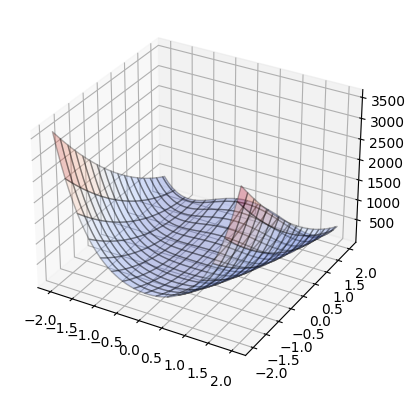

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Create a meshgrid of x and y values
xmesh, ymesh = np.mgrid[-2:2:50j, -2:2:50j]

# Evaluate the function f at each point in the meshgrid
fmesh = f(np.array([xmesh, ymesh]))

# Plot the surface using plot_surface with black edges
ax.plot_surface(xmesh, ymesh, fmesh,
                alpha=0.3, cmap=plt.cm.coolwarm, rstride=3, cstride=3, edgecolor='black')
ax.set_xticks(np.arange(-2, 2.5, 0.5))
ax.set_yticks(np.arange(-2, 2.5, 0.5))


# Show the plot
plt.show()